# 空氣污染分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

## 1. 匯入資料

In [2]:
AQXDaily=pd.read_csv("AQXDaily_20170409211519.csv")
AQXDaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
SiteId          1000 non-null int64
SiteName        1000 non-null object
MonitorDate     1000 non-null object
PSI             1000 non-null int64
SO2SubIndex     991 non-null float64
COSubIndex      920 non-null float64
O3SubIndex      852 non-null float64
PM10SubIndex    988 non-null float64
NO2SubIndex     0 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 70.4+ KB


In [3]:
AQXDaily.head()

,SiteId,SiteName,MonitorDate,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,NO2SubIndex
0,83,麥寮,2017-04-08,52,4.0,NaN,NaN,52.0,NaN
1,80,關山,2017-04-08,25,2.0,NaN,25.0,23.0,NaN
2,78,馬公,2017-04-08,27,1.0,2.0,24.0,27.0,NaN
3,77,金門,2017-04-08,24,3.0,2.0,24.0,23.0,NaN
4,75,馬祖,2017-04-08,39,5.0,5.0,37.0,39.0,NaN


In [4]:
AQXDaily.describe()

,SiteId,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,NO2SubIndex
count,1000.000000,1000.000000,991.000000,920.000000,852.000000,988.000000,0.0
mean,39.434000,63.540000,5.353179,6.884783,61.374413,55.302632,NaN
std,22.885615,12.326977,2.659534,3.886556,14.259619,11.778370,NaN
min,1.000000,24.000000,1.000000,1.000000,18.000000,17.000000,NaN
25%,20.000000,56.000000,4.000000,5.000000,52.000000,49.750000,NaN
50%,39.000000,63.000000,5.000000,6.000000,62.000000,56.000000,NaN
75%,59.000000,72.000000,7.000000,8.000000,71.000000,62.000000,NaN
max,83.000000,112.000000,28.000000,29.000000,112.000000,88.000000,NaN


In [5]:
AQXDaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
SiteId          1000 non-null int64
SiteName        1000 non-null object
MonitorDate     1000 non-null object
PSI             1000 non-null int64
SO2SubIndex     991 non-null float64
COSubIndex      920 non-null float64
O3SubIndex      852 non-null float64
PM10SubIndex    988 non-null float64
NO2SubIndex     0 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 70.4+ KB


## 2. find relation

In [3]:
AQXDaily=AQXDaily.dropna(axis=1,how="all").dropna(axis=0,how="any")

### (1)

c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000173ED6A0748>,
      dtype=object)

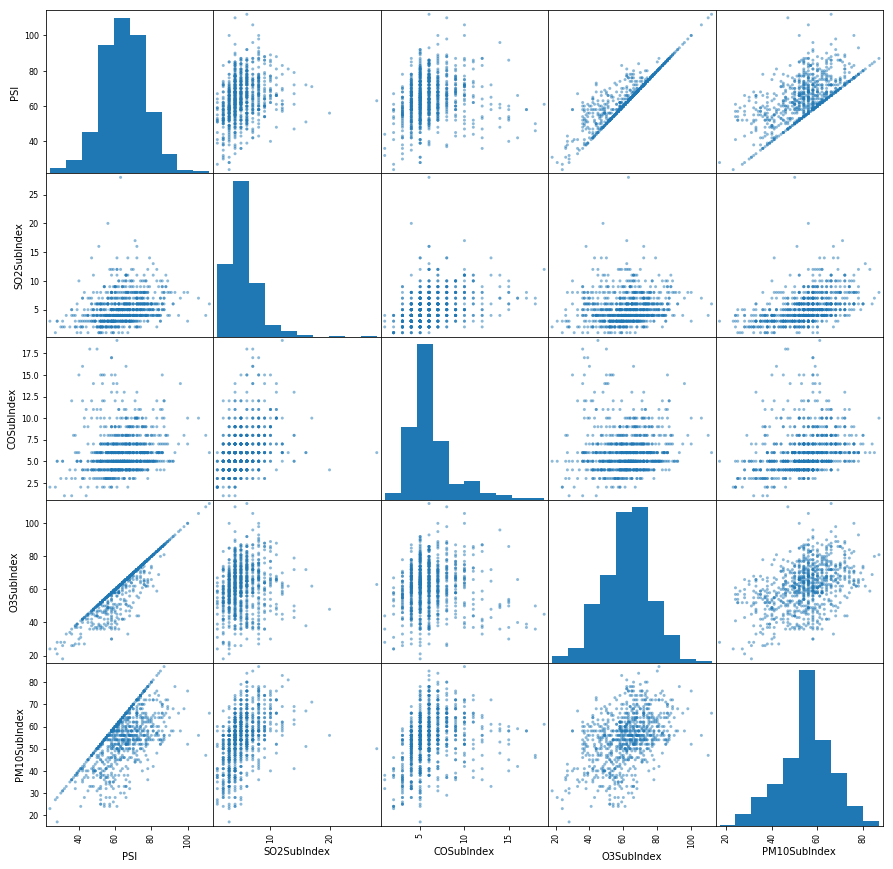

In [8]:
from pandas.tools import plotting
plotting.scatter_matrix(AQXDaily[['PSI', 'SO2SubIndex', 'COSubIndex','O3SubIndex','PM10SubIndex']],figsize=(15,15))

由上圖可以知道
1. PSI和O3SubIndex、PM10SubIndex 成正相關
2. PSI、O3SubIndex、PM10SubIndex 近似於常態分佈，而其他的是偏左的分布

### (2) t-test

In [9]:
from scipy import stats
print(stats.ttest_ind(AQXDaily['PSI'],AQXDaily['SO2SubIndex']))
print(stats.ttest_ind(AQXDaily['PSI'],AQXDaily['COSubIndex']))
print(stats.ttest_ind(AQXDaily['PSI'],AQXDaily['O3SubIndex']))
print(stats.ttest_ind(AQXDaily['PSI'],AQXDaily['PM10SubIndex']))
print(stats.ttest_ind(AQXDaily['SO2SubIndex'],AQXDaily['COSubIndex']))
print(stats.ttest_ind(AQXDaily['SO2SubIndex'],AQXDaily['O3SubIndex']))
print(stats.ttest_ind(AQXDaily['SO2SubIndex'],AQXDaily['PM10SubIndex']))
print(stats.ttest_ind(AQXDaily['COSubIndex'],AQXDaily['O3SubIndex']))
print(stats.ttest_ind(AQXDaily['COSubIndex'],AQXDaily['PM10SubIndex']))
print(stats.ttest_ind(AQXDaily['O3SubIndex'],AQXDaily['PM10SubIndex']))

Ttest_indResult(statistic=135.9914877097602, pvalue=0.0)
Ttest_indResult(statistic=134.30055691523003, pvalue=0.0)
Ttest_indResult(statistic=4.100393732126366, pvalue=4.32665618666407e-05)
Ttest_indResult(statistic=16.8996242183802, pvalue=3.4751795904884713e-59)
Ttest_indResult(statistic=-6.765108065309515, pvalue=1.8482842840194755e-11)
Ttest_indResult(statistic=-113.8732425623369, pvalue=0.0)
Ttest_indResult(statistic=-119.61007937929978, pvalue=0.0)
Ttest_indResult(statistic=-112.3210802387165, pvalue=0.0)
Ttest_indResult(statistic=-117.80144873275759, pvalue=0.0)
Ttest_indResult(statistic=11.445861404242503, pvalue=3.0839897063809674e-29)


t-test  主要是檢驗兩組之間是否有均值的差異，所以條件是有兩組也只能有兩組

T值與差異顯著性關係表

           t	           P值	   差異顯著程度

        t>=t(df)0.01	P<=0.01  	差異非常顯著

        t>=t(df)0.05	P<=0.05	    差異顯著

        t<t(df)0.05	     P>0.05	    差異不顯著

### (3) Linear Regression

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


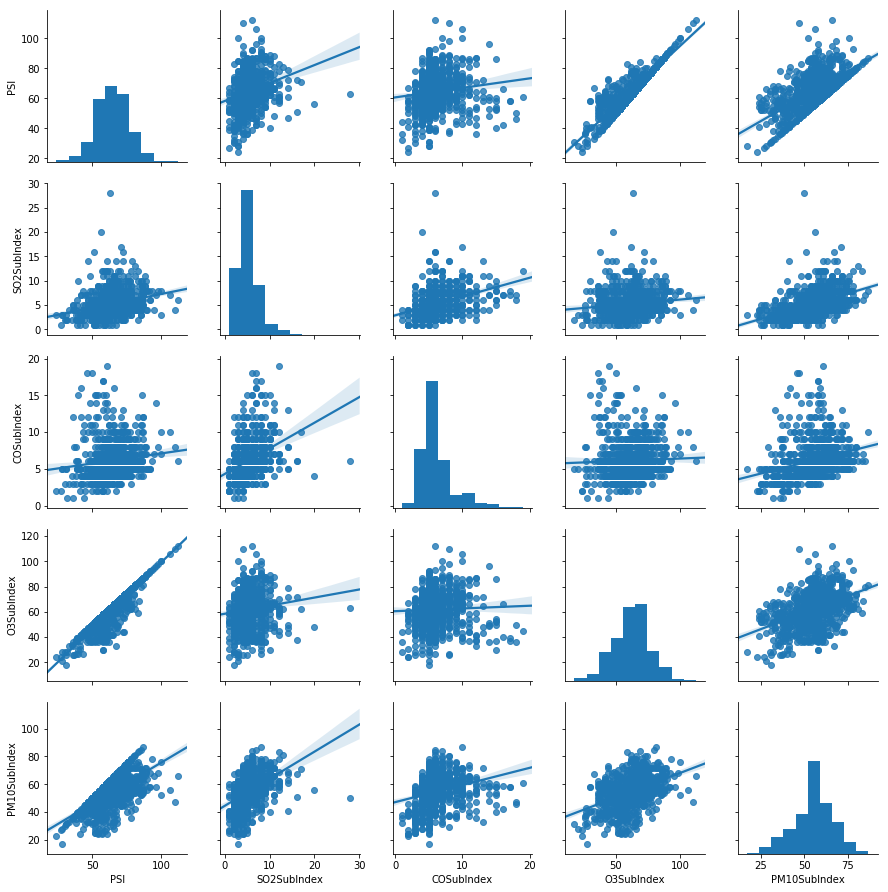

In [33]:
import seaborn as sns
sns.pairplot(AQXDaily, vars=['PSI', 'SO2SubIndex', 'COSubIndex','O3SubIndex','PM10SubIndex'],kind='reg')  

* PSI  v.s. O3SubIndex

In [4]:
np.polyfit(AQXDaily['PSI'],AQXDaily['O3SubIndex'],deg=1)

array([ 1.05293927, -6.07415947])

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


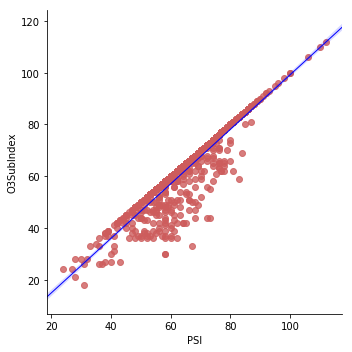

In [24]:
import seaborn as sns

sns.lmplot('PSI', 'O3SubIndex', AQXDaily,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});

* PSI  v.s.  PM10SubIndex

In [25]:
np.polyfit(AQXDaily['PSI'],AQXDaily['PM10SubIndex'],deg=1)

array([ 0.59054509, 16.52731824])

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


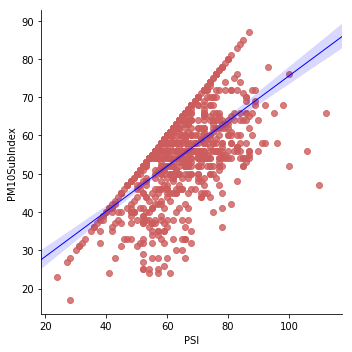

In [27]:
sns.lmplot('PSI', 'PM10SubIndex', AQXDaily,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});

### (3) Anova

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

## 3.

In [20]:
import geopy
from geopy.geocoders import Nominatim
loc=list(set(AQXDaily["SiteName"]))
dic={}
for place in loc:
    temp=[]
    geolocator = Nominatim()
    location = geolocator.geocode("台灣"+place)
    temp.append(location.latitude)
    temp.append(location.longitude)
    dic[place]=temp

In [21]:
dic

{'朴子': [23.464961, 120.247014],
 '觀音': [23.397869, 121.360305],
 '竹東': [24.7383427, 121.0949094],
 '斗六': [23.7050525, 120.5372523],
 '土城': [24.972201, 121.443348],
 '左營': [22.6881714, 120.309018],
 '菜寮': [25.0602676, 121.4921055],
 '林園': [24.97176185, 121.551120222051],
 '美濃': [22.8363731, 121.0928033],
 '嘉義': [23.4811089, 120.4535412],
 '古亭': [25.0269376, 121.522492],
 '汐止': [25.0659457, 121.6571523],
 '松山': [25.0498852, 121.5772719],
 '陽明': [23.9739374, 120.9820179],
 '大寮': [24.586337, 120.745511],
 '臺南': [22.9912348, 120.184982],
 '淡水': [25.1677828, 121.4455744],
 '前金': [22.651844, 120.46704],
 '馬公': [23.5662167, 119.5785833],
 '新店': [24.9673093, 121.5415784],
 '龍潭': [23.868152, 120.57975],
 '金門': [22.9845659, 120.2054288],
 '萬華': [25.0334399, 121.4999266],
 '仁武': [22.7023407, 120.3522084],
 '橋頭': [22.7610541, 120.3103108],
 '崙背': [23.75884, 120.353895],
 '三義': [24.4205696, 120.7740797],
 '忠明': [23.8851427, 120.9212839],
 '小港': [22.5644525, 120.3539964],
 '林口': [23.136277, 120.48826

In [22]:
AQXDaily["SiteName"]=AQXDaily["SiteName"].map(dic)

In [23]:
AQXDaily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 2 to 999
Data columns (total 8 columns):
SiteId          820 non-null int64
SiteName        820 non-null object
MonitorDate     820 non-null object
PSI             820 non-null int64
SO2SubIndex     820 non-null float64
COSubIndex      820 non-null float64
O3SubIndex      820 non-null float64
PM10SubIndex    820 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 57.7+ KB


In [121]:
import numpy as np
from folium.plugins import HeatMapWithTime
import folium
from folium.plugins import HeatMap

In [162]:
len(ff[1])

4758

PSI

In [201]:
center_pos = [23.5, 121]
data_interesting=AQXDaily.ix[:,["MonitorDate","SiteName","PSI"]]
# 使用 numpy 建立初始資料

MontorDate=list(set(data_interesting["MonitorDate"]))
MonotorDate.sort()
# 建立連續資料
data = []
max_data=0
for ele in MontorDate:
    data_temp=data_interesting[data_interesting["MonitorDate"]==ele]
    sitename_list=data_temp.SiteName.tolist()
    weight=data_temp.PSI.tolist()
    temp=[]
    for index,site in enumerate(sitename_list):
        temp=temp+(site+ np.random.normal(size=(weight[index], 2)) * 0.01).tolist()
    data.append(temp)
    if len(temp)>max_data:
        max_data=len(temp)
ff=[]
for data_time in data:
    lost=max_data-len(data_time)
    for i in range(lost):
        data_time.append([0,0])
    ff.append(data_time)
    
fmap = folium.Map(location=center_pos, zoom_start=8)
# fmap.add_child(HeatMapWithTime(ff)) # 顯示連續熱度圖

## 4.

In [25]:
datetime=AQXDaily["MonitorDate"]
for time in list(set(datetime)):
    l=list(AQXDaily[AQXDaily["MonitorDate"]==time].SiteId)
    s=set(AQXDaily[AQXDaily["MonitorDate"]==time].SiteId)
    if len(l)!=len(s):
        print(time)

In [77]:
data=AQXDaily.copy()
data=data[data.MonitorDate!= '2017-03-28']

In [78]:
SiteId=set()
for time in list(set(datetime)):
    s=set(data[data["MonitorDate"]==time].SiteId)
    if len(SiteId)==0:
        SiteId=s
        continue
    if s!=SiteId:
        SiteId=SiteId & s
len(SiteId)

57

In [79]:
SiteId=list(SiteId)
data=data[data["SiteId"].isin(SiteId)]

In [80]:
del data["SiteName"]

In [74]:
a=data.describe()
a

,SiteId,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,38.425439,63.736842,5.165205,5.947368,60.967836,53.891813
std,21.476849,12.286873,2.569198,2.487481,14.146550,11.324186
min,2.000000,24.000000,1.000000,1.000000,18.000000,17.000000
25%,20.000000,56.000000,4.000000,4.000000,52.000000,47.750000
50%,38.500000,64.000000,5.000000,5.000000,62.000000,55.000000
75%,56.000000,72.000000,6.000000,7.000000,70.000000,61.000000
max,78.000000,112.000000,28.000000,19.000000,112.000000,87.000000


In [81]:
def normalize(x):
    std=a[ele].std()
    mean=a[ele].mean()
    return abs(x-mean)/std
normalize_data=["SiteId","PSI","SO2SubIndex","COSubIndex","O3SubIndex","PM10SubIndex"]
for ele in normalize_data:
    data[ele]=data[ele].apply(normalize)

In [82]:
data

,SiteId,MonitorDate,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex
2,0.170750,2017-04-08,0.487733,0.380025,0.371603,0.491057,0.442417
3,0.175095,2017-04-08,0.501157,0.371670,0.371603,0.491057,0.460092
4,0.183784,2017-04-08,0.434039,0.363314,0.359085,0.433097,0.389391
5,0.196818,2017-04-08,0.335600,0.375847,0.367430,0.326092,0.362878
8,0.209852,2017-04-08,0.331126,0.367492,0.367430,0.321634,0.331946
11,0.222887,2017-04-08,0.384820,0.367492,0.354912,0.433097,0.340784
12,0.227231,2017-04-08,0.411667,0.375847,0.363257,0.410804,0.367297
13,0.231576,2017-04-08,0.304279,0.363314,0.363257,0.294883,0.420323
14,0.235921,2017-04-08,0.474310,0.375847,0.367430,0.473223,0.429160
15,0.240266,2017-04-08,0.469835,0.375847,0.359085,0.517808,0.424741
